In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('force2020_data_unsupervised_learning.csv')
data

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,1.884186,80.200851,494.528,NaN,20.915468,161.131180
1,1.889794,79.262886,494.680,NaN,19.383013,160.603470
2,1.896523,74.821999,494.832,NaN,22.591518,160.173615
3,1.891913,72.878922,494.984,NaN,32.191910,160.149429
4,1.880034,71.729141,495.136,NaN,38.495632,160.128342
...,...,...,...,...,...,...
18265,2.630211,19.418915,3271.416,0.187811,NaN,NaN
18266,2.643114,21.444370,3271.568,0.185574,NaN,NaN
18267,2.681300,22.646879,3271.720,0.176074,NaN,NaN
18268,2.738337,22.253584,3271.872,0.174617,NaN,NaN


In [3]:
data.shape

(18270, 6)

In [4]:
data.isnull().sum()

RHOB           0
GR             0
DEPTH_MD       0
NPHI        4238
PEF         1830
DTC           81
dtype: int64

In [5]:
data.dropna(inplace=True)

In [6]:
data

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
4238,1.774626,55.892757,1138.704,0.765867,1.631495,147.837677
4239,1.800986,60.929138,1138.856,0.800262,1.645080,142.382431
4240,1.817696,62.117264,1139.008,0.765957,1.645873,138.258331
4241,1.829333,61.010860,1139.160,0.702521,1.620216,139.198914
4242,1.813854,58.501236,1139.312,0.639708,1.504854,144.290085
...,...,...,...,...,...,...
16435,2.468236,90.537521,2993.256,0.341534,4.699200,86.474564
16436,2.457519,88.819122,2993.408,0.351085,4.699200,86.187599
16437,2.429228,92.128922,2993.560,0.364982,4.699200,87.797836
16438,2.425479,95.870255,2993.712,0.367323,5.224292,88.108452


In [7]:
from sklearn.preprocessing import StandardScaler

data = data.drop('DEPTH_MD', axis=1)

In [8]:
data[['RHOB_T', 'GR_T', 'NPHI_T', 'PEF_T', 'DTC_T']] = StandardScaler().fit_transform(data[['RHOB', 'GR', 'NPHI', 'PEF', 'DTC']])
data

,RHOB,GR,NPHI,PEF,DTC,RHOB_T,GR_T,NPHI_T,PEF_T,DTC_T
4238,1.774626,55.892757,0.765867,1.631495,147.837677,-1.491843,-0.179292,2.523654,-1.255364,0.869531
4239,1.800986,60.929138,0.800262,1.645080,142.382431,-1.387067,-0.010859,2.770744,-1.247886,0.690042
4240,1.817696,62.117264,0.765957,1.645873,138.258331,-1.320646,0.028875,2.524300,-1.247450,0.554350
4241,1.829333,61.010860,0.702521,1.620216,139.198914,-1.274390,-0.008126,2.068584,-1.261572,0.585297
4242,1.813854,58.501236,0.639708,1.504854,144.290085,-1.335919,-0.092056,1.617342,-1.325067,0.752808
...,...,...,...,...,...,...,...,...,...,...
16435,2.468236,90.537521,0.341534,4.699200,86.474564,1.265151,0.979338,-0.524699,0.433103,-1.149449
16436,2.457519,88.819122,0.351085,4.699200,86.187599,1.222550,0.921870,-0.456081,0.433103,-1.158891
16437,2.429228,92.128922,0.364982,4.699200,87.797836,1.110101,1.032560,-0.356250,0.433103,-1.105910
16438,2.425479,95.870255,0.367323,5.224292,88.108452,1.095199,1.157682,-0.339430,0.722114,-1.095690


In [9]:
data.describe()

,RHOB,GR,NPHI,PEF,DTC,RHOB_T,GR_T,NPHI_T,PEF_T,DTC_T
count,12202.000000,12202.000000,12202.000000,12202.000000,12202.000000,1.220200e+04,1.220200e+04,1.220200e+04,1.220200e+04,1.220200e+04
mean,2.149947,61.253852,0.414572,3.912313,121.409905,-5.217557e-16,7.453653e-17,-1.490731e-16,2.236096e-16,-6.708287e-16
std,0.251592,29.902708,0.139207,1.816933,30.394369,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00
min,1.493417,6.191506,0.037976,1.126667,55.726753,-2.609607e+00,-1.841459e+00,-2.705419e+00,-1.533222e+00,-2.161119e+00
25%,1.983767,42.792794,0.313797,2.629141,89.977041,-6.605409e-01,-6.173961e-01,-7.239543e-01,-7.062589e-01,-1.034210e+00
50%,2.059335,62.886322,0.466891,3.365132,138.477173,-3.601669e-01,5.459496e-02,3.758510e-01,-3.011687e-01,5.615503e-01
75%,2.389839,77.726776,0.513840,4.686422,146.242302,9.535356e-01,5.509066e-01,7.131280e-01,4.260700e-01,8.170400e-01
max,2.889454,499.022583,0.800262,17.026619,163.910797,2.939426e+00,1.464037e+01,2.770744e+00,7.218123e+00,1.398372e+00


In [10]:
def optimise_kmeans(data, max_k):
    means=[]
    inertia=[]
    
    for k in range(1, max_k):
        kmeans= KMeans(n_clusters=k)
        kmeans.fit(data)
        means.append(k)
        inertia.append(kmeans.inertia_)

    fig = plt.subplots(figsize=(10,5))
    plt.plot(means, inertia, 'o-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

C:\Users\Nicolaus\Machine Learning\sample_project_1\env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Nicolaus\Machine Learning\sample_project_1\env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Nicolaus\Machine Learning\sample_project_1\env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Nicolaus\Machine Learning\sample_project_1\env\lib\site-packages\sklearn\

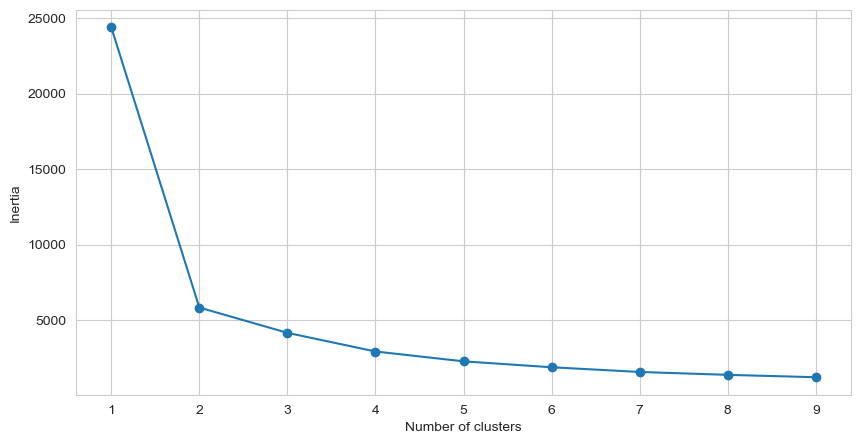

In [11]:
optimise_kmeans(data[['RHOB_T', 'NPHI_T']], 10)

In [12]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data[['NPHI_T', 'RHOB_T']])

C:\Users\Nicolaus\Machine Learning\sample_project_1\env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [13]:
data['kmeans_3'] = kmeans.labels_

In [14]:
data

,RHOB,GR,NPHI,PEF,DTC,RHOB_T,GR_T,NPHI_T,PEF_T,DTC_T,kmeans_3
4238,1.774626,55.892757,0.765867,1.631495,147.837677,-1.491843,-0.179292,2.523654,-1.255364,0.869531,0
4239,1.800986,60.929138,0.800262,1.645080,142.382431,-1.387067,-0.010859,2.770744,-1.247886,0.690042,0
4240,1.817696,62.117264,0.765957,1.645873,138.258331,-1.320646,0.028875,2.524300,-1.247450,0.554350,0
4241,1.829333,61.010860,0.702521,1.620216,139.198914,-1.274390,-0.008126,2.068584,-1.261572,0.585297,0
4242,1.813854,58.501236,0.639708,1.504854,144.290085,-1.335919,-0.092056,1.617342,-1.325067,0.752808,0
...,...,...,...,...,...,...,...,...,...,...,...
16435,2.468236,90.537521,0.341534,4.699200,86.474564,1.265151,0.979338,-0.524699,0.433103,-1.149449,1
16436,2.457519,88.819122,0.351085,4.699200,86.187599,1.222550,0.921870,-0.456081,0.433103,-1.158891,1
16437,2.429228,92.128922,0.364982,4.699200,87.797836,1.110101,1.032560,-0.356250,0.433103,-1.105910,1
16438,2.425479,95.870255,0.367323,5.224292,88.108452,1.095199,1.157682,-0.339430,0.722114,-1.095690,1


In [15]:
for k in range (1, 6):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data[['RHOB_T', 'NPHI_T']])
    data[f'kmeans{k}'] = kmeans.labels_

C:\Users\Nicolaus\Machine Learning\sample_project_1\env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Nicolaus\Machine Learning\sample_project_1\env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Nicolaus\Machine Learning\sample_project_1\env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Nicolaus\Machine Learning\sample_project_1\env\lib\site-packages\sklearn\

In [16]:
data

,RHOB,GR,NPHI,PEF,DTC,RHOB_T,GR_T,NPHI_T,PEF_T,DTC_T,kmeans_3,kmeans1,kmeans2,kmeans3,kmeans4,kmeans5
4238,1.774626,55.892757,0.765867,1.631495,147.837677,-1.491843,-0.179292,2.523654,-1.255364,0.869531,0,0,0,1,3,4
4239,1.800986,60.929138,0.800262,1.645080,142.382431,-1.387067,-0.010859,2.770744,-1.247886,0.690042,0,0,0,1,3,4
4240,1.817696,62.117264,0.765957,1.645873,138.258331,-1.320646,0.028875,2.524300,-1.247450,0.554350,0,0,0,1,3,4
4241,1.829333,61.010860,0.702521,1.620216,139.198914,-1.274390,-0.008126,2.068584,-1.261572,0.585297,0,0,0,1,3,4
4242,1.813854,58.501236,0.639708,1.504854,144.290085,-1.335919,-0.092056,1.617342,-1.325067,0.752808,0,0,0,1,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16435,2.468236,90.537521,0.341534,4.699200,86.474564,1.265151,0.979338,-0.524699,0.433103,-1.149449,1,0,1,0,1,3
16436,2.457519,88.819122,0.351085,4.699200,86.187599,1.222550,0.921870,-0.456081,0.433103,-1.158891,1,0,1,0,1,3
16437,2.429228,92.128922,0.364982,4.699200,87.797836,1.110101,1.032560,-0.356250,0.433103,-1.105910,1,0,1,0,1,3
16438,2.425479,95.870255,0.367323,5.224292,88.108452,1.095199,1.157682,-0.339430,0.722114,-1.095690,1,0,1,0,1,3


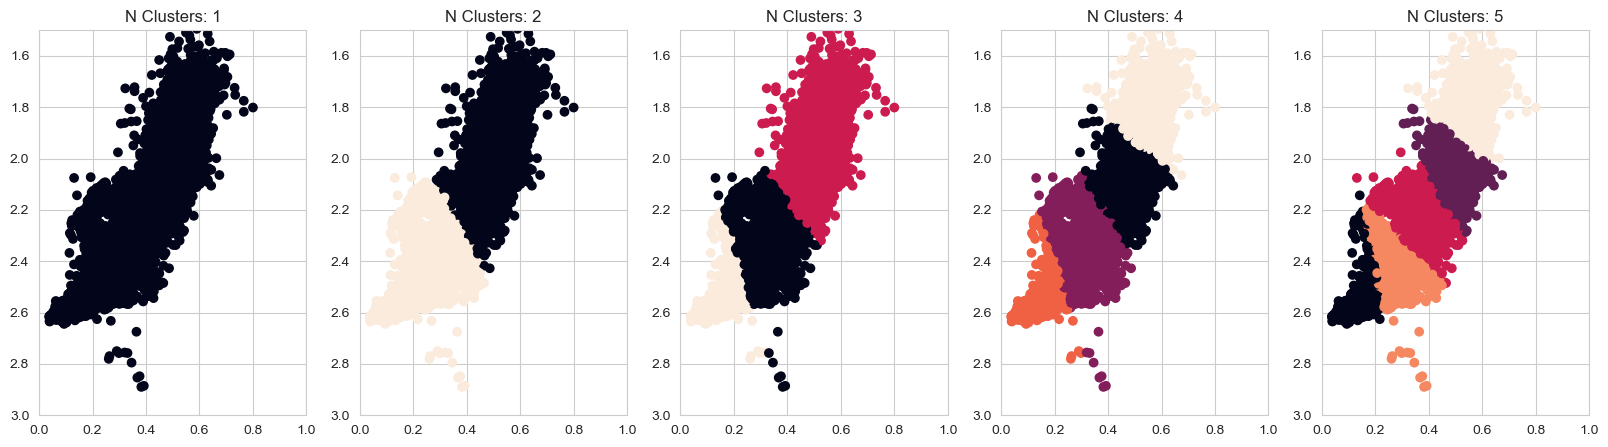

In [17]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))

for i, ax in enumerate(fig.axes, start=1):
    ax.scatter(x=data['NPHI'], y=data['RHOB'], c=data[f'kmeans{i}'])
    ax.set_ylim(3, 1.5)
    ax.set_xlim(0, 1)
    ax.set_title(f'N Clusters: {i}')